<a href="https://colab.research.google.com/github/hisaom0419/my_python/blob/master/MGR%E7%AE%97%E5%87%BA_20210429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%pwd
%cd /content/drive/MyDrive/Colab Notebooks
%ls


/content/drive/MyDrive/Colab Notebooks
 1_Maplotlib_intro.ipynb        'MGR算出(Tecan).ipynb'
 20210222_mox.xlsx               old_files/
'20210422 trans.xlsx'            __pycache__/
 20210428.ipynb                  Python_start.ipynb
 2_plt_Iris.ipynb                Rocky_Chie.xlsx
 3_sns_基本_Iris_.ipynb         'Sample_sheet_2 (1).xlsx'
 4_Iris_sns_条件とループ.ipynb   Sample_sheet_2.xlsx
 5_Dataframe_intro.ipynb         Sample_sheet_3.xlsx
 ave_OD_file.csv                 Sample_sheet.xlsx
 BioPython.ipynb                 Sc_gene_list.xlsx
 Graph_20210427.pdf              Sc_ORFs_20210428.csv
 iris.csv                        Start.ipynb
 iris_HM.xlsx                    Tecan_analysis_OD_FL1_part.ipynb
 Iris_plt_やり方2.ipynb          Tecan_analysis_saeki.ipynb
 iris.xlsx                      'Tecan(OD_FL1)_20210429.ipynb'
 Maplotlib_intro2.ipynb          Tecan_saeki_OD_FL1.ipynb
 maxGFP.xlsx                     test_plot.pdf
 maxRFP_file_20210427.xlsx       test_plot.png
 maxRFP_file.xlsx    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22521 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39178 missing from current font.
  font.set_te

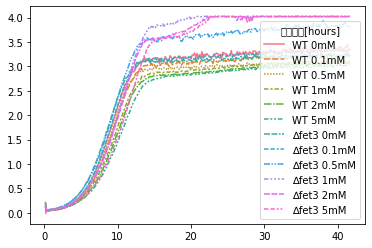

In [99]:
#データ読み込み(ver.1.0.1)

data_file = 'Rocky_Chie.xlsx' #データシート。１行目がindex。１列目もindex。
max_FL_file = 'MGR_Chie.xlsx' #最大蛍光値・MGRを保存するファイル

#データ読み込み
df = pd.read_excel(data_file,index_col=0,header=0)


# x = df.columns
# y = df.iloc[1]
# fig=plt.figure()
# ax=fig.add_subplot()
# ax.plot(x,y)

sns.lineplot(data=df.T)

In [102]:
#MGR算出ファイル（ver.2.0.1）

#測定間隔（min）、GRを算出するレンジ、R2の閾値を指定
Period = 10
Range = 25
Threshold = 0.8
Step_size = 10 #移動測定数（大きくすると処理が早くなる）

#データをログ変換
OD_log2 = np.log2(df).dropna()
Max_cycle = len(OD_log2.columns)
Well_Num = len(OD_log2) 
x = np.arange(Range)

MGR = OD_log2[1]

#WellごとにTimeウインドウを移動しながらGR（直線回帰の傾き=SlopeとR2を取得）、R2のThreshold以上のSlopeを返す（Threshold以下だと0.01を返す）。
#最終的なGRは測定時間間隔（Period）で割り(min-1)、便宜的に1000をかけている。

Well = 0

for index in MGR.index:

  Cycle = 0
  n = 0
  Slope  = np.array([])
  R2 = np.array([])
  OD_list = OD_log2.iloc[Well].values

  while Cycle < Max_cycle-Range:
    #OD_list2 = OD_list[Cycle:Cycle+Range]
    OD_list2 = np.roll(OD_list,Cycle)[0:Range]
    Slope = np.insert(Slope,n,(np.polyfit(x,OD_list2,1)[0]*100))
    R2 = np.insert(R2,n,(np.corrcoef(x,OD_list2)[0][1]**2))
    Cycle += Step_size
    n += 1

  GR = np.array([x for x in Slope[R2 > Threshold]])

  MGR[index] = GR.max()

  Well += 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=fl

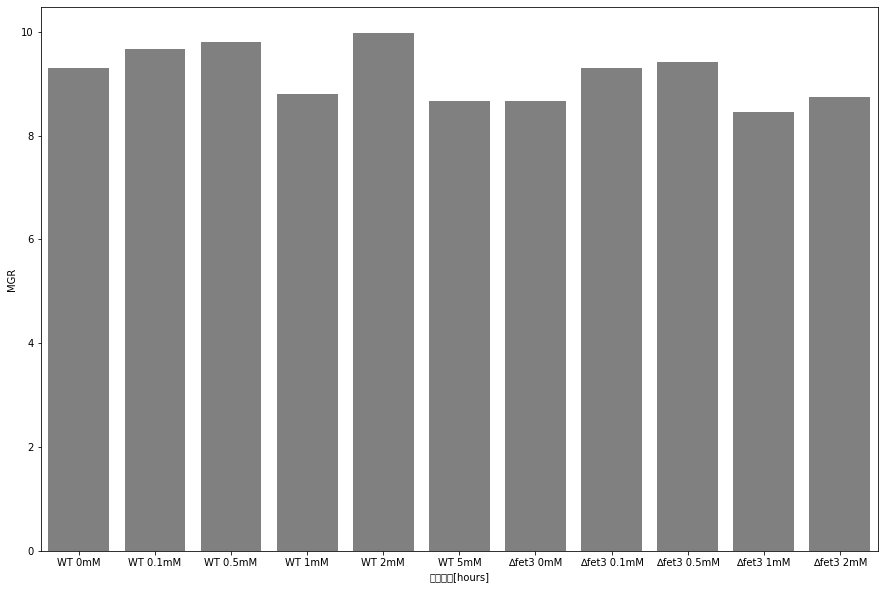

In [118]:
#MGRと最高蛍光値のグラフ化、保存（ver.1.0.0）

#MGR_max = 10 #MGRグラフ最大値

fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot()
ax1=sns.barplot(MGR.index, MGR.values,color='gray',capsize=0.2)
#ax1=sns.stripplot(MGR.index.get_level_values('Sample'), MGR.values,color='gray')
ax1.set_ylabel("MGR")
#ax1.set_ylim(0, MGR_max)

plt.tight_layout
plt.show()

MGR.to_excel(max_FL_file,sheet_name="MGR")